In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from OpCV_Utils import color_filtering, show_single_image_plt, show_multiple_images_plt

In [2]:
base_board = np.zeros((600,800, 3), dtype=np.uint8)

In [3]:
cv2.imshow('Window', base_board)
cv2.waitKey(0)
cv2.destroyAllWindows()

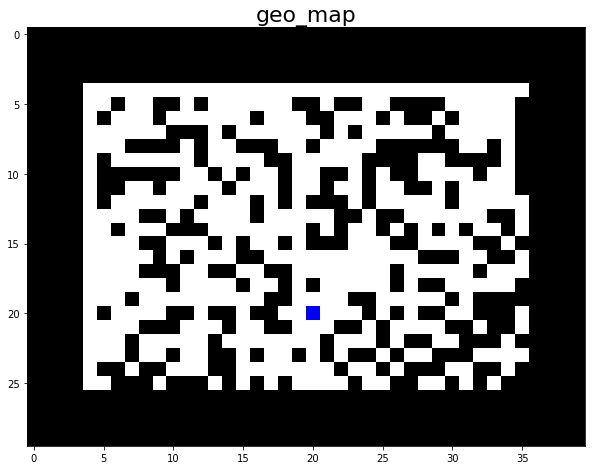

In [7]:
geo_map = np.ones((30,40), dtype=np.uint8)*255
geo_map[0:30, 0:4] = 0
geo_map[0:4, 0:40] = 0
geo_map[26:30, 0:40] = 0
geo_map[0:30, 36:40] = 0

for i in range(400):
    geo_map[random.randint(5,29), random.randint(5,39)] = 0
    
geo_map_rgb = cv2.cvtColor(geo_map, cv2.COLOR_GRAY2RGB)

p_pos = [20, 20]
geo_map_rgb[p_pos[0], p_pos[1]] = (0,0,255)

show_single_image_plt(geo_map_rgb, 'geo_map', (10,10))

In [144]:
def neighbours(geo_map, p_pos, direction):
    
    directs = {'UP':[[1,0],[1,-1],[1,1],[0,-1],[0,1]], 
               'DOWN':[[-1,0],[-1,1],[-1,-1],[0,1],[0,-1]],
               'LEFT':[[0,1],[-1,1],[1,1],[-1,0],[1,0]],
               'RIGHT':[[0,-1],[1,-1],[-1,-1],[1,0],[-1,0]]}
    
    dephts = {'UP':[[0,0]], 
               'DOWN':[],
               'LEFT':[],
               'RIGHT':[]}
    
    d = directs[direction]
    
    depht_front = geo_map.shape[0] - p_pos[0]
    depht_left_corner = geo_map.shape[0] - p_pos[0]
    depht_right_corner 
    depht_left =
    depht_right = 

    neigh_front = geo_map[p_pos[0] + d[0][0], p_pos[1]  + d[0][1]]
    neigh_left_corner = geo_map[p_pos[0] + d[1][0], p_pos[1] + d[1][1]]
    neigh_right_corner = geo_map[p_pos[0] + d[2][0], p_pos[1] + d[2][1]]
    neigh_left = geo_map[p_pos[0] + d[3][0], p_pos[1] + d[3][1]]
    neigh_right = geo_map[p_pos[0] + d[4][0], p_pos[1] + d[4][1]]
    
    return [([neigh_left_corner, neigh_front, neigh_right_corner], [neigh_left, 0, neigh_right])]

In [145]:
p_pos = [19,19]

direction = 'UP'
print(neighbours(geo_map, p_pos, direction))
direction = 'DOWN'
print(neighbours(geo_map, p_pos, direction))
direction = 'LEFT'
print(neighbours(geo_map, p_pos, direction))
direction = 'RIGHT'
print(neighbours(geo_map, p_pos, direction))

[([255, 255, 255], [255, 0, 0])]
[([255, 255, 255], [0, 0, 255])]
[([255, 255, 255], [255, 0, 255])]
[([255, 0, 255], [255, 0, 255])]
